# 합성곱 신경망의 시각화

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 가중치 시각화

In [1]:
# 모듈 불러오기
from tensorflow import keras

In [2]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2022-01-08 04:46:54--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-01-08 04:46:55--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4044200 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  18.5MB/s    in 0.2s    

2022-01-08 04:46:56 (18.5 MB/s) - ‘best-cnn-model.h5.1’ saved [4044200/4044200]



In [2]:
# 훈련된 모델 구조 + 파라미터 불러오기
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
# 확인용 코드 - layers 구조 확인
model.layers

In [4]:
# 훈련된 모델의 첫번째 layer(첫번째 Conv2D 층)
conv = model.layers[0]

# 확인용 코드 - [훈련된 모델의 첫번째 Conv2D 층] 가중치, 절편 크기
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
# [훈련된 모델의 첫번째 Conv2D 층] 가중치
conv_weights = conv.weights[0].numpy()

# [훈련된 모델의 첫번째 Conv2D 층 가중치]의 평균, 표준편차
print(conv_weights.mean(), conv_weights.std())

-0.019709207 0.23122567


In [6]:
# 모듈 불러오기
import matplotlib.pyplot as plt

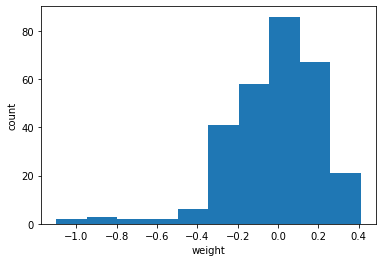

In [7]:
# [훈련된 모델의 첫번째 Conv2D층 가중치] 시각화(히스토그램)
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

plt.show()

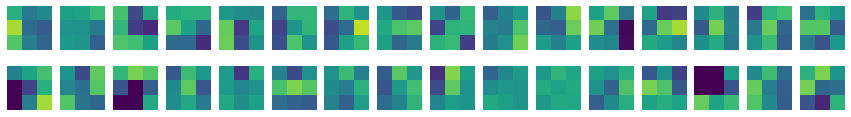

In [10]:
# [훈련된 모델의 첫번째 Conv2D 층] 커널 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

In [11]:
# 신경망 모델 생성 - 훈련하지 않은 빈 합성곱 신경망
no_training_model = keras.Sequential()

# 신경망 밀집층(은닉층 + 출력층) 추가
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [12]:
# 훈련하지 않은 모델의 첫번째 layer(첫번째 Conv2D 층)
no_training_conv = no_training_model.layers[0]

# 확인용 코드 - [훈련하지 않은 모델의 첫번째 Conv2D 층] 가중치
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
# [훈련하지 않은 모델의 첫번째 Conv2D 층] 가중치
no_training_weights = no_training_conv.weights[0].numpy()

# [훈련하지 않은 모델의 첫번째 Conv2D 층 가중치]의 평균, 표준편차
print(no_training_weights.mean(), no_training_weights.std())

-0.001316255 0.08420355


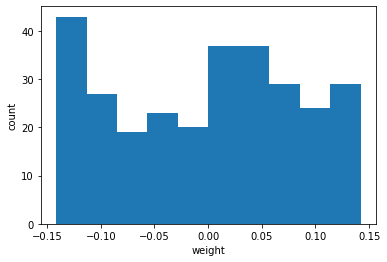

In [14]:
# [훈련하지 않은 모델의 첫번째 Conv2D층 가중치] 시각화(히스토그램)
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

plt.show()

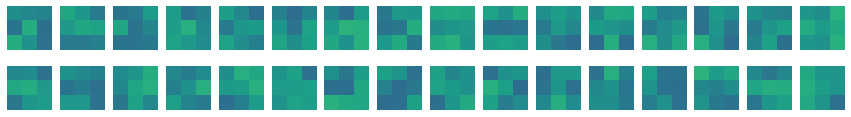

In [15]:
# [훈련하지 않은 모델의 첫번째 Conv2D 층] 커널 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

## 함수형 API

In [17]:
# [훈련된 모델]의 입력
print(model.input)

Tensor("conv2d_input:0", shape=(None, 28, 28, 1), dtype=float32)


In [18]:
# 첫번째 Conv2D로만 구성된 모델 = [훈련된 모델]의 입력 + [훈련된 모델의 첫번째 Conv2D 층]의 출력
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [20]:
# 패션 MNIST 데이터 다운로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

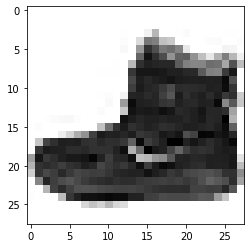

In [21]:
# 확인용 코드 - 일부 데이터 이미지 출력
plt.imshow(train_input[0], cmap='gray_r')

plt.show()

In [23]:
# SGD Classifier 사용을 위한 정규화 + 2차원 배열 -> 3차원 배열 변경
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

# 모델의 특성맵 = 일부 데이터
feature_maps = conv_acti.predict(inputs)

In [24]:
# 확인용 코드 - 특성맵 크기
print(feature_maps.shape)

(1, 28, 28, 32)


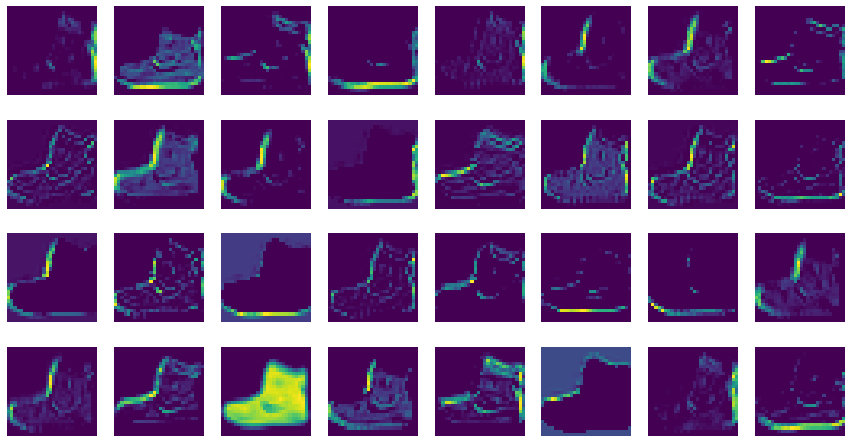

In [25]:
# [훈련된 모델의 첫번째 Conv2D 층]의 출력 특성맵 시각화
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
        
plt.show()

In [26]:
# 두번째 Conv2D로만 구성된 모델 = [훈련된 모델]의 입력 + [훈련된 모델의 두번째 Conv2D 층]의 출력
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [27]:
# SGD Classifier 사용을 위한 정규화 + 2차원 배열 -> 3차원 배열 변경
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [28]:
# 확인용 코드 - 특성맵 크기
print(feature_maps.shape)

(1, 14, 14, 64)


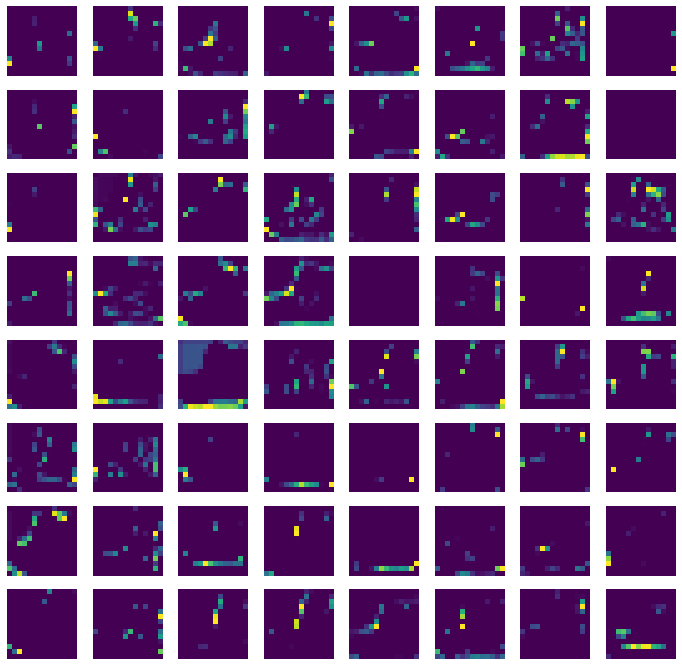

In [29]:
# [훈련된 모델의 두번째 Conv2D 층]의 출력 특성맵 시각화
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
        
plt.show()